In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

2023-04-04 14:55:15.609001: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print(tf.__version__)

2.12.0


In [3]:
import pathlib

In [6]:
data_dir = pathlib.Path("data/img_data/").with_suffix('')

In [7]:
data_dir

PosixPath('data/img_data')

In [10]:
image_count = len(list(data_dir.glob("*/*.jpg")))

In [11]:
image_count

1475

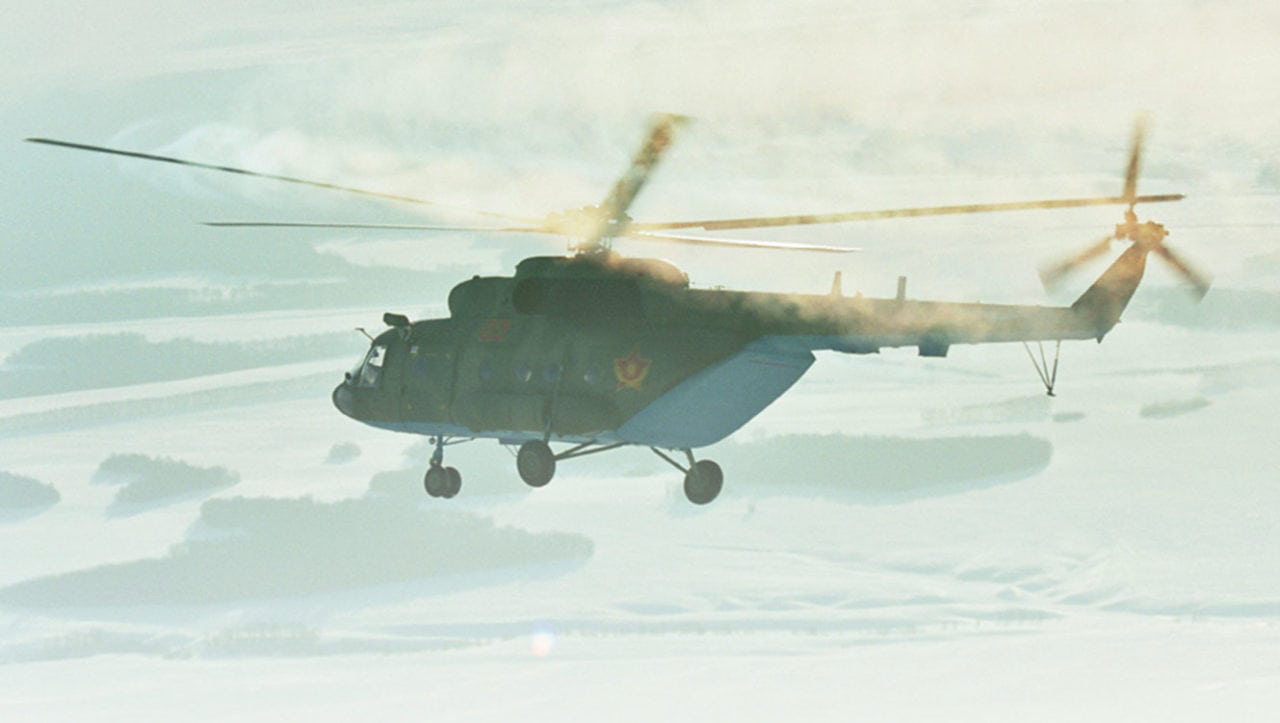

In [13]:
roses = list(data_dir.glob("helicopter/*"))
PIL.Image.open(str(roses[0]))

In [14]:
batch_size = 32
img_height = 128
img_width = 128

In [15]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 1475 files belonging to 3 classes.
Using 1180 files for training.


In [16]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 1475 files belonging to 3 classes.
Using 295 files for validation.


In [17]:
class_names = train_ds.class_names
print(class_names)

['car', 'helicopter', 'rocket']


2023-04-04 15:03:16.642693: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1180]
	 [[{{node Placeholder/_4}}]]
2023-04-04 15:03:16.643098: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1180]
	 [[{{node Placeholder/_4}}]]


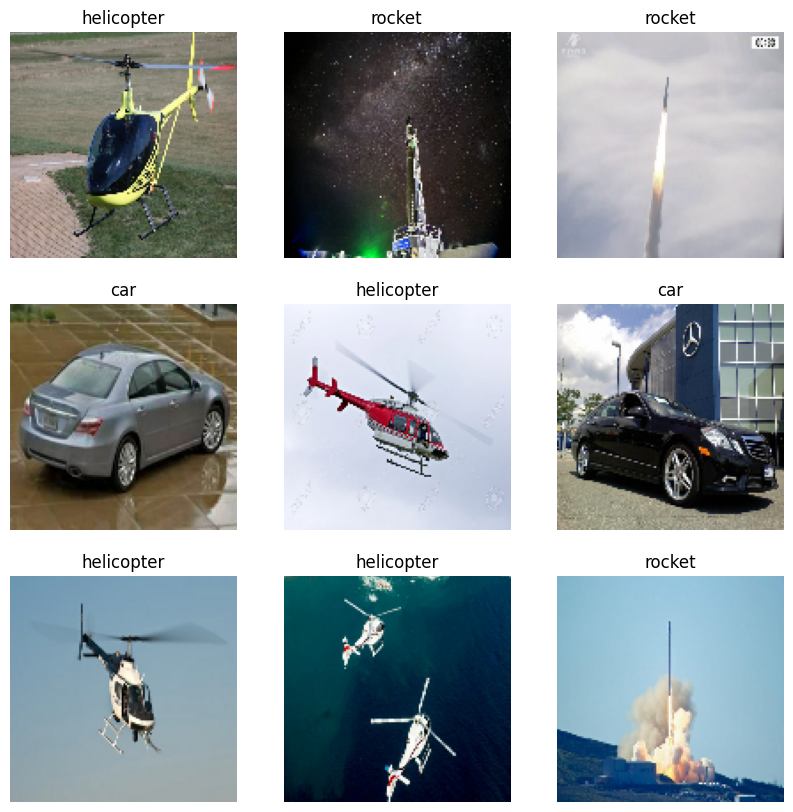

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [20]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 128, 128, 3)
(32,)


In [21]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [22]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

2023-04-04 15:06:24.022208: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1180]
	 [[{{node Placeholder/_0}}]]
2023-04-04 15:06:24.022679: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1180]
	 [[{{node Placeholder/_4}}]]


0.0 1.0


In [23]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [24]:
num_classes = 3

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [25]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [26]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3


2023-04-04 15:07:55.644146: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1180]
	 [[{{node Placeholder/_0}}]]
2023-04-04 15:07:55.644653: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1180]
	 [[{{node Placeholder/_4}}]]


37/37 [==============================] - ETA: 0s - loss: 0.7491 - accuracy: 0.6839

2023-04-04 15:08:20.928699: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [295]
	 [[{{node Placeholder/_4}}]]
2023-04-04 15:08:20.929266: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [295]
	 [[{{node Placeholder/_0}}]]


37/37 [==============================] - 30s 689ms/step - loss: 0.7491 - accuracy: 0.6839 - val_loss: 0.6354 - val_accuracy: 0.7254
Epoch 2/3
37/37 [==============================] - 14s 389ms/step - loss: 0.4271 - accuracy: 0.8246 - val_loss: 0.5657 - val_accuracy: 0.7898
Epoch 3/3
37/37 [==============================] - 16s 422ms/step - loss: 0.3315 - accuracy: 0.8831 - val_loss: 0.5038 - val_accuracy: 0.8203
